# Exercício 4 - Física Moderna (ANP)
#### Aluno: João Vitor Pereira Amorim

---

**Questão:**
Simule o teleporte quântico: use um simulador para mostrar que o estado enviado por Alice realmente chega a Bob, ou seja, verifique se o estado foi realmente transmitido para Bob.

---

**Solução:**

Primeiramente, importamos as bibliotecas:

In [49]:
%matplotlib inline
import matplotlib
from qiskit import *
from qiskit.extensions import Initialize
from qiskit.tools.visualization import plot_histogram

Iniciamos o circuito com três qubits e três registradores. O qubit *q0* é inicializado em |1> e trata-se do qubit da Alice, cujo estado será teleportado para Bob. O qubit *q1* é inicializado em |0> e será utilizado como um qubit auxiliar. Enquanto isso, o qubit *q2* é inicializado com |0> também, sendo que ele se trata do qubit do Bob, que receberá o estado do *q0* através do teleporte. 

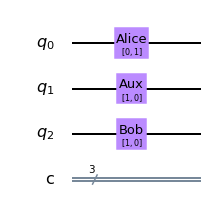

In [50]:
circuit = QuantumCircuit(3, 3)

initializer = Initialize([0,1])
initializer.label = "Alice"
circuit.append(initializer, [0])

initializer = Initialize([1,0])
initializer.label = "Aux"
circuit.append(initializer, [1])

initializer = Initialize([1,0])
initializer.label = "Bob"
circuit.append(initializer, [2])

circuit.draw(output='mpl')

Para realizar o teleporte quântico, estarei seguindo o *Quantum Teleportation Protocol* (fonte no final), e o primeiro requisito que ele solicita é que devemos criar um entrelaçamento quântico entre o *q1* e o *q2*. Podemos fazer isso da seguinte maneira: aplicamos uma porta Hadamard no *q1* e, logo após, uma porta CNOT entre o *q1* e o *q2*:

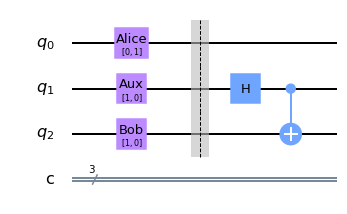

In [51]:
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

Agora, *q1* e *q2* estão entrelaçados. Em seguida, no próximo passo do *Quantum Teleportation Protocol*, devemos aplicar uma porta CNOT entre o *q0* e o *q1* e, também, uma porta Hadamard no *q0*:

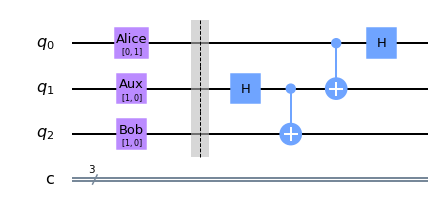

In [52]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

Seguindo com o *Quantum Teleportation Protocol*, devemos adicionar duas medições, uma no *q0* e outra no *q1*, sendo que as medidas serão registradas pelos registradores 0 e 1, respectivamente:

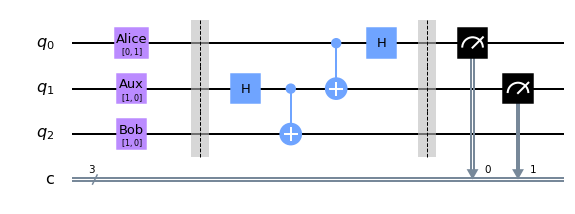

In [53]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

A última etapa do *Quantum Teleportation Protocol* diz que devemos aplicar mais duas portas ao circuito: uma CNOT entre entre *q1* e *q2* e uma porta Pauli-Z controlada entre *q0* (qubit da Alice) e *q1* (qubit do Bob):

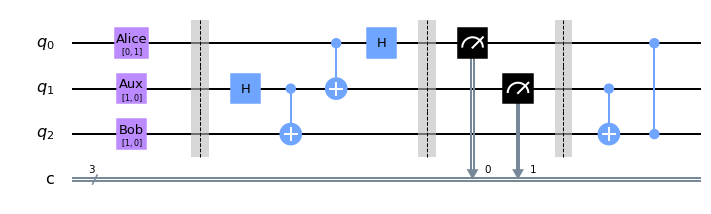

In [54]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

O circuito acima possui o *Quantum Teleportation Protocol* aplicado. Agora já é possível fazer a simulação e comprovar que o protocolo funciona, mostrando que o estado |1> do qubit da Alice (*q0*) foi teleportado para o qubit do Bob (*q2*).

Para isso ser feito, primeiro precisamos adicionar uma medição ao *q2* (que será registrada no registrador 2):

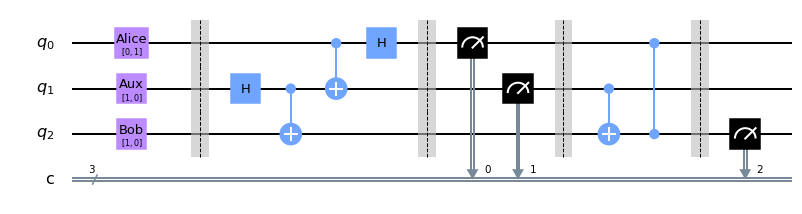

In [55]:
circuit.barrier()
circuit.measure(2,2)
circuit.draw(output='mpl')

Agora, executamos o circuito no simulador e obtemos o resultado:

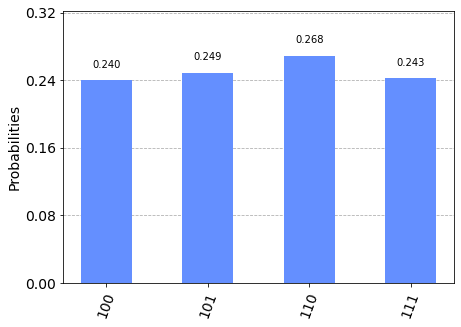

In [56]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

*Entendendo como fazer a leitura do histograma:*

*O histograma apresenta a porcentagem de ocorrência de estados nos três qubits simultaneamente (estado final do circuito). Dessa forma, 100 significa: estado 1 no q2, estado 0 no q1 e estado 0 no q0.*

Portanto, para confirmarmos que o estado do qubit de Alice (*q0* que possuia o estado |1>) foi teleportado para o qubit de Bob (*q2*), basta verificarmos se temos 100% de ocorrência do estado 1 nas medidas do *q2* no histograma. De fato, **isso acontece**, já que *q2* é sempre 1 em todas as medidas realizadas no histograma:

<img src="example.png">

Podemos até fazer um milhão de medidas para mostrar que o teleporte sempre funciona:

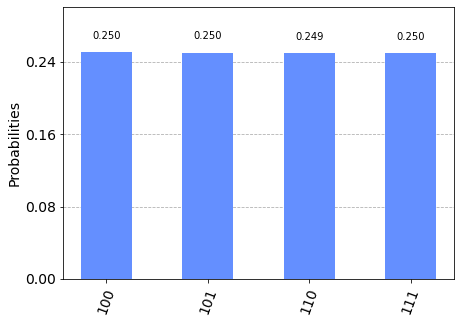

In [57]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1000000).result()
counts = result.get_counts()
plot_histogram(counts)

Novamente, temos 100% de ocorrência do estado 1 nas medições do *q2*. Isso significa que o teleporte realmente funciona, e que **teleportamos o estado do qubit de Alice para o qubit de Bob!**

---

**Referências:**

- Quantum Computation and Quantum Information. Nielsen, Michael A., Chuang, Isaac L.
- Quantum Teleportation. Qiskit. https://qiskit.org/textbook/ch-algorithms/teleportation.html
- Quantum Teleportation Algorithm. Qiskit (YouTube). https://youtu.be/mMwovHK2NrE